In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import math
import lab_funcs as lf
import my_funcs as mf

# –ò–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è –º–Ω–æ–≥–æ—á–ª–µ–Ω–∞–º–∏


## –ó–∞–¥–∞–Ω–∏—è
1. –ò–∑–º–µ–Ω–∏—Ç–µ –º–µ—Ç–æ–¥ `__call__`, —Ç–∞–∫ —á—Ç–æ–±—ã –æ–Ω —Ä–µ–∞–ª–∏–∑–æ–≤—ã–≤–∞–ª [—Å—Ö–µ–º—É –ì–æ—Ä–Ω–µ—Ä–∞](https://ru.wikipedia.org/wiki/–°—Ö–µ–º–∞_–ì–æ—Ä–Ω–µ—Ä–∞). –ß–µ–º —ç—Ç–∞ —Å—Ö–µ–º–∞ –ª—É—á—à–µ?
2. –ü–æ—á–µ–º—É –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –º–Ω–æ–≥–æ—á–ª–µ–Ω–∞ —á–µ—Ä–µ–∑ —Ä–µ—à–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º—ã –¥–∞–µ—Ç –æ—à–∏–±–æ—á–Ω—ã–π –æ—Ç–≤–µ—Ç? 
3. –ù–∞–π–¥–∏—Ç–µ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ–ª—å –º–∞—Ç—Ä–∏—Ü—ã –í–∞–Ω–¥–µ—Ä–º–æ–Ω–¥–∞ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ –∏ —á–∏—Å–ª–µ–Ω–Ω–æ. 
4. –ù–∞–π–¥–∏—Ç–µ —á–∏—Å–ª–∞ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ –º–∞—Ç—Ä–∏—Ü—ã –í–∞–Ω–¥–µ—Ä–º–æ–Ω–¥–∞. –°—Ä–∞–≤–Ω–∏—Ç–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç–∏ —Ä–µ—à–µ–Ω–∏—è —Å–∏—Å—Ç–µ–º—ã –∏ –Ω–µ–≤—è–∑–∫—É —Å —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º.

## –†–µ—à–µ–Ω–∏—è
1. –í —Å—Ö–µ–º–µ –ì–æ—Ä–Ω–µ—Ä–∞ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –º–µ–Ω—å—à–µ –∞—Ä–∏—Ñ–º–µ—Ç–∏—á–µ—Å–∫–∏—Ö –¥–µ–π—Å—Ç–≤–∏–π, —Ç–µ–º —Å–∞–º—ã–º –∞–ª–≥–æ—Ä–∏—Ç–º —Ä–∞–±–æ—Ç–∞–µ—Ç –±—ã—Å—Ç—Ä–µ–µ. –¢–∞–∫–∂–µ —Ç—Ä–∞—Ç–∏—Ç –º–µ–Ω—å—à–µ —Ä–µ—Å—É—Ä—Å–æ–≤. –ì–æ—Ä–Ω–µ—Ä - $2n$, –ø—Ä–µ–¥—ã–¥—É—â–∞—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è - $3n$.

2. –ù–∞—Ö–æ–¥—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Å–ø–æ—Å–æ–±–æ–º —Ä–µ—à–µ–Ω–∏—è –°–õ–ê–£ –º—ã –ø–æ–ª—É—á–∞–µ–º –±–æ–ª—å—à—É—é –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å (–ü–ª–æ—Ö–æ–µ –æ–±—É—Å–ª–æ–≤–ª–∏–≤–∞–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã). –õ—É—á—à–µ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ —É–∑–Ω–∞—Ç—å —Ñ–æ—Ä–º—É–ª—É –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –º–Ω–æ–≥–æ—á–ª–µ–Ω–∞ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏ –∏ –ø—Ä–∏–º–µ–Ω—è—Ç—å –µ–µ, —Ç–µ–º —Å–∞–º—ã–º –±—É–¥–µ—Ç –º–µ–Ω—å—à–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π –∏ –º–µ–Ω—å—à–µ –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å.

Absolute error of values 5.815173923391337e-12
Absolure Horner error of values 4.5367587665182066e-12
Absolute coef error of coefficients 84471.09093929436
Absolute Horner's coef error of coefficients 84471.09093929436


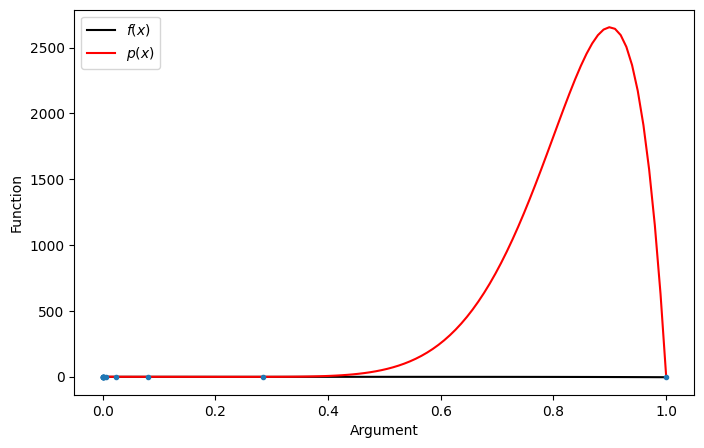

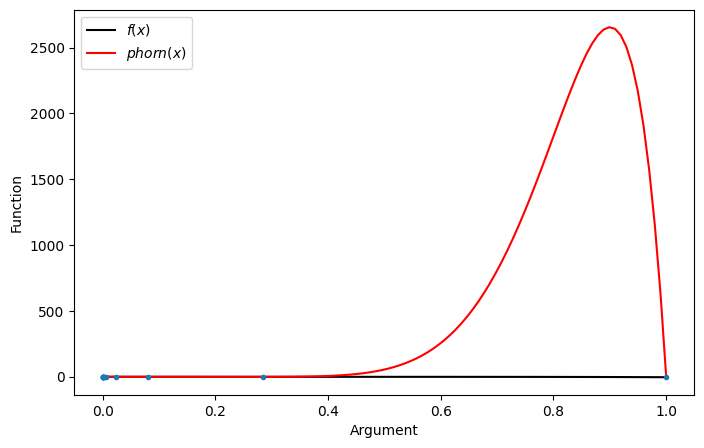

In [2]:
N = 12 
x = np.logspace(-6,0,N) 

f = mf.Poly(np.random.randn(N))
y = f(x) 
p = lf.interp_naive(x, y) 
p_horn = mf.interp_Horn(x, y)
z = p(x) 
z_horn = p_horn(x)
print("Absolute error of values", np.linalg.norm(z-y))
print("Absolure Horner error of values", np.linalg.norm(z_horn - y))
print("Absolute coef error of coefficients", np.linalg.norm(f.pn-p.pn))
print("Absolute Horner's coef error of coefficients", np.linalg.norm(f.pn-p_horn.pn))

#plotting old result
t = np.linspace(0,1,100)
_, ax = plt.subplots(figsize=(8,5))
ax.plot(t, f(t), '-k')
ax.plot(t, p(t), '-r')
ax.plot(x, f(x), '.')
ax.set_xlabel("Argument")
ax.set_ylabel("Function")
ax.legend(["$f(x)$", "$p(x)$"])
plt.show()

#plotting Horner result
_, ax = plt.subplots(figsize=(8,5))
ax.plot(t, f(t), '-k')
ax.plot(t, p_horn(t), '-r')
ax.plot(x, f(x), '.')
ax.set_xlabel("Argument")
ax.set_ylabel("Function")
ax.legend(["$f(x)$", "$p horn(x)$"])
plt.show()

3. , 4. –¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è —Ñ–æ—Ä–º—É–ª–∞ –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ã –í–∞–Ω–¥–µ—Ä–º–æ–Ω–¥–∞ 
\begin{equation}
  \det{M} = \prod_{1\leq i\leq j \leq n} (x_j - x_i)
\end{equation}


In [3]:
N = 8
x = np.logspace(-6,0,N) 

print("–¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ–ª—è: ", mf.det_theory(x))
print("–ó–Ω–∞—á–µ–Ω–∏–µ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ–ª—è —á–µ—Ä–µ–∑ –≤—Å—Ç—Ä–æ–µ–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é: ", np.linalg.det(lf.vandermonde(x)))
print("–ß–∏—Å–ª–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏: ", np.linalg.cond(lf.vandermonde(x)))

print("–ù–µ–≤—è–∑–∫–∞:", mf.get_residual(x))


–¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ–ª—è:  3.074989474009367e-49
–ó–Ω–∞—á–µ–Ω–∏–µ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ–ª—è —á–µ—Ä–µ–∑ –≤—Å—Ç—Ä–æ–µ–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é:  3.0762329131211013e-49
–ß–∏—Å–ª–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏:  8.170674473359558e+16
–ù–µ–≤—è–∑–∫–∞: 1.1407278470011966


## –ó–∞–¥–∞–Ω–∏—è

5. –†–µ–∞–ª–∏–∑—É–π—Ç–µ –º–µ—Ç–æ–¥ –≠–π—Ç–∫–µ–Ω–∞ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –º–Ω–æ–≥–æ—á–ª–µ–Ω–∞.  
6. –ï—Å–ª–∏ –º—ã –ø–æ–ø—ã—Ç–∞–µ–º—Å—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –º–Ω–æ–≥–æ—á–ª–µ–Ω —á–µ—Ä–µ–∑ –µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Ç–æ—á–∫–∞—Ö, –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –∑–∞–¥–∞–Ω–∏—é 2, –ø–æ–ª—É—á–∏–º –ª–∏ –º—ã —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –≠–π—Ç–∫–µ–Ω–∞ –æ—Ç–≤–µ—Ç —Ç–æ—á–Ω–µ–µ, —á–µ–º —á–µ—Ä–µ–∑ —Ä–µ—à–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º—ã?
7. Scipy —Å–æ–¥–µ—Ä–∂–∏—Ç –≥–æ—Ç–æ–≤—É—é —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –º–Ω–æ–≥–æ—á–ª–µ–Ω–∞ –õ–∞–≥—Ä–∞–Ω–∂–∞ [`scipy.interpolate.lagrange`](docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.lagrange.html). –í –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –æ—Ç–º–µ—á–∞–µ—Ç—Å—è, —á—Ç–æ –º–µ—Ç–æ–¥ —á–∏—Å–ª–µ–Ω–Ω–æ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤. –ß—Ç–æ —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç?
8. –û—à–∏–±–∫–∏ –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –º–Ω–æ–≥–æ—á–ª–µ–Ω–∞ –≤—ã–∑—ã–≤–∞—é—Ç –æ—à–∏–±–∫–∏ –ø—Ä–∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏–∏ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –º–Ω–æ–≥–æ—á–ª–µ–Ω–∞ –≤ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã—Ö —Ç–æ—á–∫–∞—Ö. –ü—Ä–∏ –∫–∞–∫–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–∏ —É–∑–ª–æ–≤ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è –º–Ω–æ–≥–æ—á–ª–µ–Ω–æ–º –õ–∞–≥—Ä–∞–Ω–∂–∞ –∏–º–µ–µ—Ç –Ω–∞–∏–º–µ–Ω—å—à—É—é –æ—à–∏–±–∫—É? –ö–∞–∫ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —á–∏—Å–ª–µ–Ω–Ω–æ–π —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å—é? 

## –†–µ—à–µ–Ω–∏—è

5., 6. –î–∞, –º—ã –¥–æ–ª–∂–Ω—ã –ø–æ–ª—É—á–∏—Ç—å –æ—Ç–≤–µ—Ç —Ç–æ—á–Ω–µ–µ —á–µ–º —á–µ—Ä–µ–∑ —Ä–µ—à–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º—ã. –ù–æ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —ç—Ç–∞ —Ä–∞–∑–Ω–∏—Ü–∞ –Ω–µ –æ—Å–æ–±–æ –≤–µ–ª–∏–∫–∞. –†–∞–∑–Ω–∏—Ü–∞ –µ—Å—Ç—å –≤–æ –≤—Ä–µ–º–µ–Ω–∏ —Ä–∞–±–æ—Ç—ã –∞–ª–≥–æ—Ä–∏—Ç–º–∞.

Absolute error of Aitken's values 1.7765649940215224e-14
Absolute error of Aitken's coefficients 149.72264115881225
Absolute error of values 3.5644038291324e-15
Absolute error of coefficients 149.65970510290862


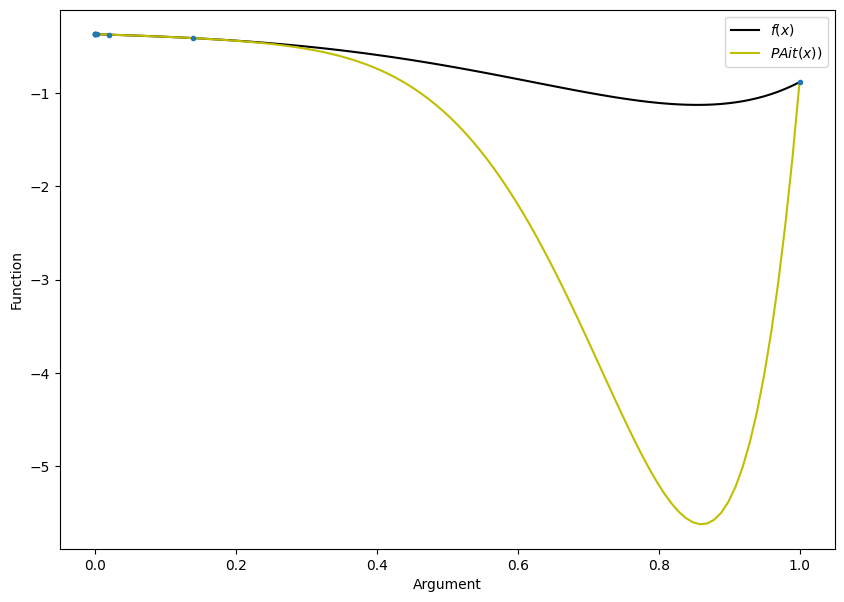

In [4]:
N = 8 
x = np.logspace(-6,0,N) 
f = lf.Poly(np.random.randn(N))
y = f(x) 

P_Ait = mf.Aitken(x,y)
z_Ait = P_Ait(x)

p = lf.interp_naive(x, y) 
z = p(x) 

print("Absolute error of Aitken's values", np.linalg.norm(z_Ait-y))
print("Absolute error of Aitken's coefficients", np.linalg.norm(f.pn-P_Ait.pn))

print("Absolute error of values", np.linalg.norm(z-y))
print("Absolute error of coefficients", np.linalg.norm(f.pn-p.pn))

t = np.linspace(0,1,100)
_, ax = plt.subplots(figsize=(10,7))
ax.plot(t, f(t), '-k')
ax.plot(t, P_Ait(t), '-y')

ax.plot(x, f(x), '.')
ax.set_xlabel("Argument")
ax.set_ylabel("Function")
ax.legend(["$f(x)$", "$PAit(x))$",])
plt.show()

mass = np.array(y).tolist()
j = 0
for i in range(0,N-1):
  for k in range(0, N-1-j):
    pols = (mass[k]*(x[k+1+j]-t) - mass[k+1]*(x[k]-t))/(x[k+1+j]-x[k])
    mass.append(pols)

  del mass[:N-j]
  j = j + 1


7. –ß–∏—Å–ª–µ–Ω–Ω–∞—è –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –¥–∞–∂–µ –Ω–µ–±–æ–ª—å—à–∏–µ –æ—à–∏–±–∫–∏ –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç–∏ –≤ –∑–Ω–∞—á–µ–Ω–∏—è—Ö —É–∑–ª–æ–≤‚Äã –∏–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏‚Äã) –º–æ–≥—É—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–º –æ—à–∏–±–∫–∞–º –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏. –ü—Ä–∏—á–∏–Ω—ã —á–∏—Å–ª–µ–Ω–Ω–æ–π –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –º–µ—Ç–æ–¥–∞ –õ–∞–≥—Ä–∞–Ω–∂–∞ —Å–≤—è–∑–∞–Ω—ã —Å –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è–º–∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π:

–í–ª–∏—è–Ω–∏–µ –≥–ª–æ–±–∞–ª—å–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã: –ü–æ–ª–∏–Ω–æ–º –õ–∞–≥—Ä–∞–Ω–∂–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –µ–¥–∏–Ω—É—é –≥–ª–æ–±–∞–ª—å–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–æ—Ö–æ–¥–∏—Ç —á–µ—Ä–µ–∑ –≤—Å–µ —É–∑–ª—ã –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏. –ï—Å–ª–∏ —É–∑–ª—ã —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –∏–ª–∏ –Ω–∞ –±–æ–ª—å—à–∏—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞—Ö, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–æ–ª–∏–Ω–æ–º–∞ —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –æ—á–µ–Ω—å –±–æ–ª—å—à–∏–º–∏. –≠—Ç–æ —É—Å–∏–ª–∏–≤–∞–µ—Ç –≤–ª–∏—è–Ω–∏–µ –æ—à–∏–±–æ–∫ –æ–∫—Ä—É–≥–ª–µ–Ω–∏—è –ø—Ä–∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è—Ö.

–û—Å—Ü–∏–ª–ª—è—Ü–∏–∏ (—ç—Ñ—Ñ–µ–∫—Ç –†—É–Ω–≥–µ): –î–ª—è —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö —É–∑–ª–æ–≤ –Ω–∞ –±–æ–ª—å—à–∏—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞—Ö –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –ø–æ–ª–∏–Ω–æ–º –õ–∞–≥—Ä–∞–Ω–∂–∞ –º–æ–∂–µ—Ç –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞—Ç—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Å—Ü–∏–ª–ª—è—Ü–∏–∏ –≤–±–ª–∏–∑–∏ –∫–æ–Ω—Ü–æ–≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞, –¥–∞–∂–µ –µ—Å–ª–∏ –∏—Å—Ö–æ–¥–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≥–ª–∞–¥–∫–∞—è.

–°–ª–æ–∂–Ω–æ—Å—Ç—å –≤—ã—á–∏—Å–ª–µ–Ω–∏–π: –ú–µ—Ç–æ–¥ –õ–∞–≥—Ä–∞–Ω–∂–∞ —Ç—Ä–µ–±—É–µ—Ç –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –±–∞–∑–∏—Å–Ω—ã—Ö –ø–æ–ª–∏–Ω–æ–º–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —É–∑–ª–∞

8. –ù–∞–∏–º–µ–Ω—å—à–∞—è –æ—à–∏–±–∫–∞ –ø—Ä–∏ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –º–Ω–æ–≥–æ—á–ª–µ–Ω–æ–º –õ–∞–≥—Ä–∞–Ω–∂–∞ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è, –µ—Å–ª–∏ —É–∑–ª—ã –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –ø–æ –∫–æ—Ä–Ω—è–º –ø–æ–ª–∏–Ω–æ–º–∞ –ß–µ–±—ã—à—ë–≤–∞. –≠—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ —Å–≥—É—â–∞—è—Å—å –∫ –∫—Ä–∞—è–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –æ–Ω–∏ —É–º–µ–Ω—å—à–∞—é—Ç —ç—Ñ—Ñ–µ–∫—Ç –†—É–Ω–≥–µ (–æ—Å—Ü–∏–ª—è—Ü–∏–∏ –Ω–∞ –∫—Ä–∞—è—Ö).

# –ó–∞–¥–∞–Ω–∏—è

9. –ù–∞–π–¥–∏—Ç–µ –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –ø—Ä–∏–ª–∏–∂–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ $f$ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω—ã–º –º–Ω–æ–≥–æ–ª—á–µ–Ω–æ–º $p$ –¥–ª—è $x0=10, 100, 1000$ –∏ –¥–ª—è $N=5, 10, 15$. –û–±—ä—è—Å–Ω–∏—Ç–µ –ø–æ–ª—É—á–∞—é—â–∏–µ—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

10. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—à–∏–±–∫–∏ –æ—Ç —á–∏—Å–ª–∞ —É–∑–ª–æ–≤ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ $N$ –¥–ª—è $x0=100$ –∏ $r=5$ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ  $5\leq N \leq 50$. 

11. –ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –∑–∞–¥–∞–Ω–∏—è 9 –∏ 10 –¥–ª—è —É–∑–ª–æ–≤ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –ß–µ–±—ã—à–µ–≤–∞:

$$x_n=x0+r\cos\left(\frac{\pi}{2}\frac{2n-1}{N}\right),\; k=1\ldots N.$$

12. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –≤–Ω—É—Ç—Ä–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ $x\in[x0-r,x0+r]$ –¥–ª—è —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã—Ö —É–∑–ª–æ–≤ –∏ –¥–ª—è —É–∑–ª–æ–≤ –ß–µ–±—ã—à–µ–≤–∞.

13. –ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –∑–∞–¥–∞–Ω–∏—è 9 –∏ 10 –¥–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ $f(x)=|x-1|$, $x0=1$, $r=1$. –û–±—ä—è—Å–Ω–∏—Ç–µ –Ω–∞–±–ª—é–¥–∞—é—â–∏–µ—Å—è —Ä–∞–∑–ª–∏—á–∏—è.

# –†–µ—à–µ–Ω–∏—è

9 - 10.

–ú–∞–∫—Å–∏–º—É–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –æ—Ç –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏

\begin{equation}
|| f - p_n || \leq \frac{||f^{(n)} || \cdot ||w_n||}{n!}
\end{equation}

–ù–æ—Ä–º–∞ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –≤–µ—Å–∞ $w_n(x)$
\begin{equation}
  w_n(x) = \prod_{i = 1}^n (x - x_i)
\end{equation}

–î–∞–Ω–Ω–∞—è —Ñ–æ—Ä–º—É–ª–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ $n$ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å. –ò —Ç–∞–∫–∂–µ –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ $x$ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –∫–∞–∫ –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å, —Ç–∞–∫ –∏ –æ—à–∏–±–∫–∞.

–ü–æ–ª—É—á–∏–≤—à–∏–µ—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è —Ä–∞–∑–Ω—ã—Ö $N$ –∏ $x_0$:
|   N\x0  |   $10$   |  $100$ | $1000$ |
|--------|----------------|-------------|-------------|
| $5$ | $21$ | $200$ | $1942$ |
| $10$ | $53$ | $290$ | $145295$ |
| $15$ | $5$ | $4676$ | $29153$ |

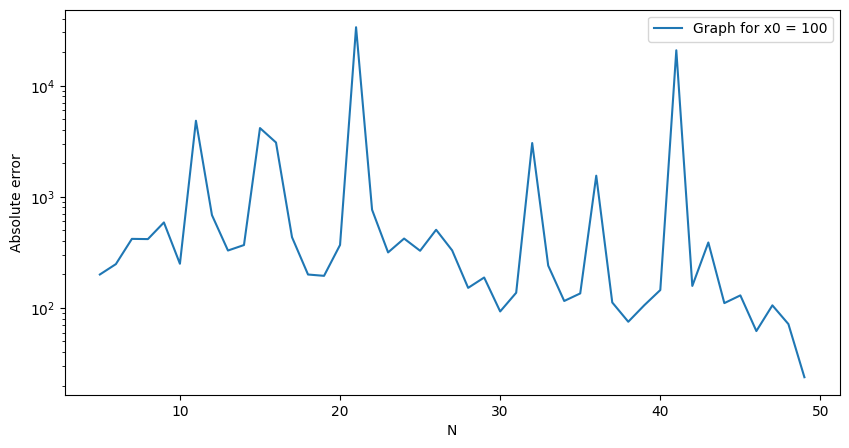

In [7]:
#–í –∫–∞—á–µ—Å—Ç–≤–µ –∏–Ω—Ç–µ—Ä–ø–æ–ª–∏—Ä—É–µ–º–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –≤–æ–∑—å–º–µ–º f(x)=x sin(2x).
def f(x):
    return x*np.sin(2*x)
number = []
num_error = []
# –ë—É–¥–µ–º –∏–Ω—Ç–µ—Ä–ø–æ–ª–∏—Ä–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ [x0-r,x0+r], –≥–¥–µ
x0 = 100
r = 5
tn = np.linspace(x0-r, x0+r, 1000)

for N in range(5,50):
# –í –∫–∞—á–µ—Å—Ç–≤–µ —É–∑–ª–æ–≤ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –≤–æ–∑—å–º–µ–º —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—É—é —Ä–µ—à–µ—Ç–∫—É –∏–∑ N —É–∑–ª–æ–≤.
    xn = np.linspace(x0-r, x0+r, N)

# –ü–æ—Å—Ç—Ä–æ–∏–º –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –º–Ω–æ–≥–æ—á–ª–µ–Ω.
    p = lf.interp_naive(xn, f(xn))

    error = np.abs(f(tn)-p(tn))
    number.append(N)
    num_error.append(np.max(error))

_, ax = plt.subplots(figsize=(10,5))
ax.semilogy(number, num_error)
ax.legend(["Graph for x0 = 100"])
ax.set_xlabel("N")
ax.set_ylabel("Absolute error")
plt.show()

11. 

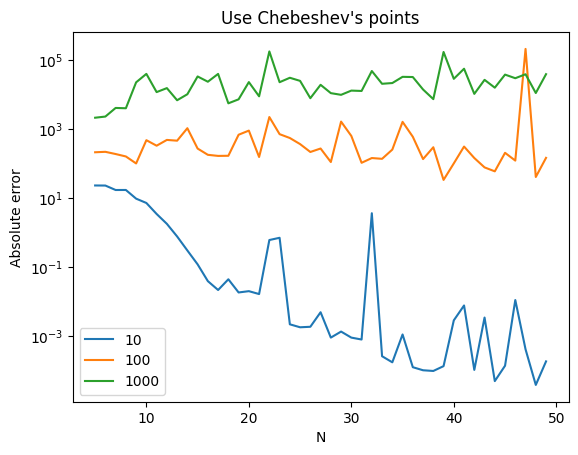

In [28]:
def f(x):
    return x*np.sin(2*x)

# –ë—É–¥–µ–º –∏–Ω—Ç–µ—Ä–ø–æ–ª–∏—Ä–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ [x0-r,x0+r], –≥–¥–µ
for x0 in [10, 100, 1000]:

    r = 5
    tn = np.linspace(x0-r, x0+r, 1000)
    xn = np.linspace(x0-r, x0+r, 50)
    error = []
    number = []
    num_error = []


    # –í –∫–∞—á–µ—Å—Ç–≤–µ —É–∑–ª–æ–≤ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –≤–æ–∑—å–º–µ–º —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—É—é —Ä–µ—à–µ—Ç–∫—É –∏–∑ N —É–∑–ª–æ–≤.
    for i in range(50):
        xn[i] = x0+r*np.cos(np.pi/2*(2*i+1)/50)
    y = f(xn)


    for N in range(5,50):
        xn = np.linspace(x0-r, x0+r, N)
    # –í –∫–∞—á–µ—Å—Ç–≤–µ —É–∑–ª–æ–≤ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –≤–æ–∑—å–º–µ–º —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—É—é —Ä–µ—à–µ—Ç–∫—É –∏–∑ N —É–∑–ª–æ–≤.
        for i in range(N):
            xn[i] = x0+r*np.cos(np.pi/2*(2*i+1)/N)
        y = f(xn)

    # –ü–æ—Å—Ç—Ä–æ–∏–º –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –º–Ω–æ–≥–æ—á–ª–µ–Ω.
        p = lf.interp_naive(xn, f(xn))

        error = np.abs(f(tn)-p(tn))
        number.append(N)
        num_error.append(np.max(error))
    
    # ploting
    plt.semilogy(number, num_error)

plt.xlabel("N")
plt.ylabel("Absolute error")
plt.legend(["10", "100", "1000"])
plt.title("Use Chebeshev's points")
plt.show()



12. –ß–µ–±–µ—à–æ–≤—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª—É—á—à–µ

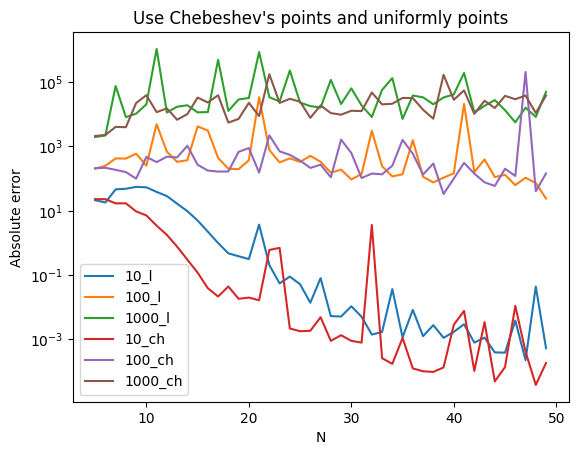

In [31]:
def f(x):
    return x*np.sin(2*x)

## –†–ê–í–ù–û–ú–ï–†–ù–û–ï –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –¢–û–ß–ï–ö
# –ë—É–¥–µ–º –∏–Ω—Ç–µ—Ä–ø–æ–ª–∏—Ä–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ [x0-r,x0+r], –≥–¥–µ
for x0 in [10, 100, 1000]:

    r = 5
    tn = np.linspace(x0-r, x0+r, 1000)
    xn = np.linspace(x0-r, x0+r, 50)
    error = []
    number = []
    num_error = []

    for N in range(5,50):
        xn = np.linspace(x0-r, x0+r, N)
        y = f(xn)

    # –ü–æ—Å—Ç—Ä–æ–∏–º –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –º–Ω–æ–≥–æ—á–ª–µ–Ω.
        p = lf.interp_naive(xn, f(xn))

        error = np.abs(f(tn)-p(tn))
        number.append(N)
        num_error.append(np.max(error))
    
    # ploting
    plt.semilogy(number, num_error)



## –ß–ï–ë–ï–®–û–í–°–ö–û–ï –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –¢–û–ß–ï–ö
# –ë—É–¥–µ–º –∏–Ω—Ç–µ—Ä–ø–æ–ª–∏—Ä–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ [x0-r,x0+r], –≥–¥–µ
for x0 in [10, 100, 1000]:

    r = 5
    tn = np.linspace(x0-r, x0+r, 1000)
    xn = np.linspace(x0-r, x0+r, 50)
    error = []
    number = []
    num_error = []

    for N in range(5,50):
        xn = np.linspace(x0-r, x0+r, N)
    # –í –∫–∞—á–µ—Å—Ç–≤–µ —É–∑–ª–æ–≤ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –≤–æ–∑—å–º–µ–º —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—É—é —Ä–µ—à–µ—Ç–∫—É –∏–∑ N —É–∑–ª–æ–≤.
        for i in range(N):
            xn[i] = x0+r*np.cos(np.pi/2*(2*i+1)/N)
        y = f(xn)

    # –ü–æ—Å—Ç—Ä–æ–∏–º –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –º–Ω–æ–≥–æ—á–ª–µ–Ω.
        p = lf.interp_naive(xn, f(xn))

        error = np.abs(f(tn)-p(tn))
        number.append(N)
        num_error.append(np.max(error))
    
    # ploting
    plt.semilogy(number, num_error)

plt.xlabel("N")
plt.ylabel("Absolute error")
plt.legend(["10_l", "100_l", "1000_l", "10_ch", "100_ch", "1000_ch"])
plt.title("Use Chebeshev's points and uniformly points")
plt.show()

13. –ì—Ä–∞—Ñ–∏–∫ —Ç–∞–∫ —Å–µ–±—è –≤–µ–¥–µ—Ç, —Ç.–∫. –µ—Å—Ç—å –æ—à–∏–±–∫–∞ –∏–∑ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏. –§—É–Ω–∫—Ü–∏—è –Ω–µ –≥–ª–∞–¥–∫–∞—è –≤ –Ω—É–ª–µ.

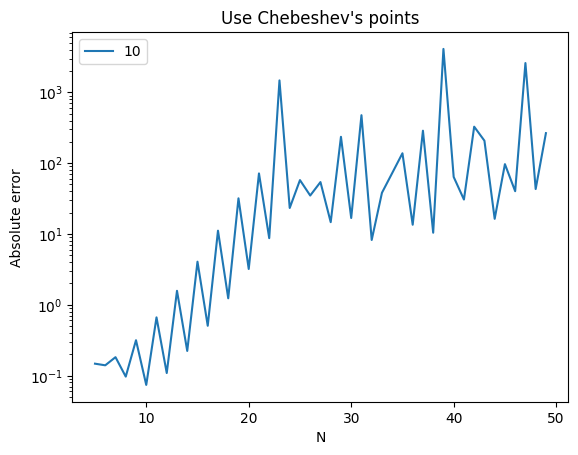

In [37]:
def f(x):
    return np.abs(x-1)

# –ë—É–¥–µ–º –∏–Ω—Ç–µ—Ä–ø–æ–ª–∏—Ä–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ [x0-r,x0+r], –≥–¥–µ
for x0 in [1]:

    r = 1
    tn = np.linspace(x0-r, x0+r, 1000)
    error = []
    number = []
    num_error = []


    for N in range(5,50):
        xn = np.linspace(x0-r, x0+r, N)
        y = f(xn)

    # –ü–æ—Å—Ç—Ä–æ–∏–º –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –º–Ω–æ–≥–æ—á–ª–µ–Ω.
        p = lf.interp_naive(xn, f(xn))

        error = np.abs(f(tn)-p(tn))
        number.append(N)
        num_error.append(np.max(error))
    
    # ploting
    plt.semilogy(number, num_error)

plt.xlabel("N")
plt.ylabel("Absolute error")
plt.legend(["10", "100", "1000"])
plt.title("Use Chebeshev's points")
plt.show()

# –ó–∞–¥–∞–Ω–∏—è

14. –î–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ –∏–∑ –∑–∞–¥–∞–Ω–∏—è 9 –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—É–±–∏—á–µ—Å–∫–∏–π —Å–ø–ª–∞–π–Ω –¥–µ—Ñ–µ–∫—Ç–∞ 1 —Å —É–∑–ª–∞–º–∏ –∏–∑ –∑–∞–¥–∞–Ω–∏—è 9. –ú–æ–∂–µ—Ç–µ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Ñ—É–Ω–∫—Ü–∏—è–º–∏ `scipy.interpolate.splrep` –∏ `scipy.interpolate.splev` –∏–ª–∏ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Å–≤–æ–∏ –∞–Ω–∞–ª–æ–≥–∏.

15. –ò–∑—É—á–∏—Ç–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç–∏ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ —Å–ø–ª–∞–π–Ω–æ–º –æ—Ç —á–∏—Å–ª–∞ —É–∑–ª–æ–≤ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏. –°—Ä–∞–≤–Ω–∏—Ç–µ —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –∏–∑ –∑–∞–¥–∞–Ω–∏—è 10. –ö–æ–≥–¥–∞ –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç–∏ —Å–æ–≤–ø–∞–¥—É—Ç?

16. –ö–∞–∫ –º–æ–∂–Ω–æ –æ–±–æ–±—â–∏—Ç—å –∏–∑—É—á–µ–Ω–Ω—ã–µ –º–µ—Ç–æ–¥—ã –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –Ω–∞ –∫—Ä–∏–≤—ã–µ –≤ –º–Ω–æ–≥–æ–º–µ—Ä–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ? 

17. –ö–∞–∫ –º–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø–æ–ª–∏—Ä–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö?

18. –ö–∞–∫–∏–µ –µ—â–µ —Å–ø–æ—Å–æ–±—ã –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ —Å—É—â–µ—Å—Ç–≤—É—é—Ç?

14. 

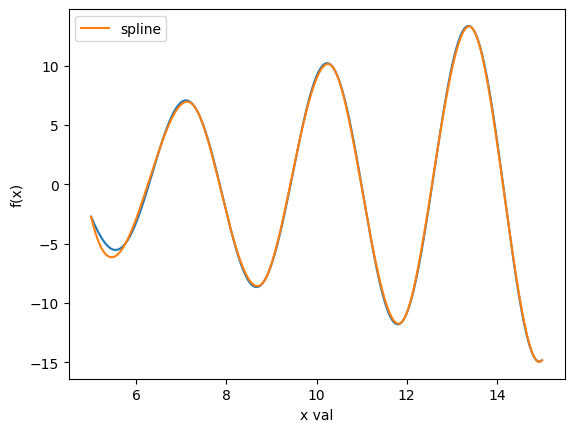

In [44]:
def f(x):
    return x*np.sin(2*x)
from scipy.interpolate import splev, splrep
for x0 in [10]:
    r = 5
    tn = np.linspace(x0-r, x0+r, 10000)

    xn = np.linspace(x0-r, x0+r, 14)
    yn = f(xn)
    spl = splrep(xn, yn)
    y2 = splev(tn, spl)
    plt.plot(tn,f(tn))
    plt.plot(tn,y2,label = 'spline')
plt.xlabel("x val")
plt.ylabel("f(x)")
plt.legend()

15. –î–ª—è –∫—É–±–∏—á–µ—Å–∫–æ–≥–æ —Å–ø–ª–∞–π–Ω–∞ –µ—Å—Ç—å —Ñ–æ—Ä–º—É–ª–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —É–∑–ª–æ–≤:
$x \in [a,b]$, $M = \max|f^{(4)}(x)|$
\begin{equation}
|| f(x) - S_n(x) || \leq \frac{M(x-a)(b - x)}{n^4}
\end{equation}

–ù–æ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –ø–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –∞–±—Å–æ–ª—é—Ç–Ω–æ–π –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç–∏ –∏ —Å—Ä–∞–≤–Ω–∏–º —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º–∏ –≥—Ä–∞—Ñ–∏–∫–∞–º–∏.

c:\Users\tor\Desktop\numerecal methods\laboratory_work_4\lab_funcs.py:24: RuntimeWarning: overflow encountered in multiply
  a *= x # –ü–æ–≤—ã—à–∞–µ–º —Å—Ç–µ–ø–µ–Ω—å –æ–¥–Ω–æ—á–ª–µ–Ω–∞
c:\Users\tor\Desktop\numerecal methods\laboratory_work_4\lab_funcs.py:29: RuntimeWarning: overflow encountered in power
  return np.power(xn[:,None], np.arange(len(xn))[None,:])


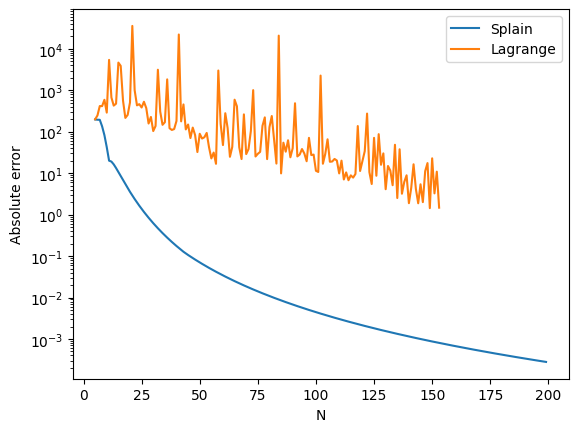

In [46]:
number = []
num_error = []
x0 = 100
r = 5
tn = np.linspace(x0-r, x0+r, 10000)
# –°–ø–ª–∞–π–Ω
for N in range(5,200):
    xn = np.linspace(x0-r, x0+r, N)
    yn = f(xn)
    spl = splrep(xn, yn)
    y2 = splev(tn, spl)
    error = np.abs(f(tn)-y2)
    number.append(N)
    num_error.append(np.max(error))

plt.semilogy(number, num_error)

number = []
num_error = []
# –û–±—ã—á–Ω–∞—è –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è
for N in range(5,200):
    xn = np.linspace(x0-r, x0+r, N)
    yn = f(xn)
    p = lf.interp_naive(xn, yn)
    y2 = p(tn)
    error = np.abs(f(tn)-y2)
    number.append(N)
    num_error.append(np.max(error))

plt.semilogy(number, num_error)

plt.legend(["Splain", "Lagrange"])
plt.xlabel("N")
plt.ylabel("Absolute error")
plt.show()

16. 
–ò–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—é –º–æ–∂–Ω–æ –æ–±–æ–±—â–∏—Ç—å –Ω–∞ –º–Ω–æ–≥–æ–º–µ—Ä–Ω—ã–µ –∫—Ä–∏–≤—ã–µ –∏ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏, –∏—Å–ø–æ–ª—å–∑—É—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∏–∑–∞—Ü–∏—é –∫—Ä–∏–≤—ã—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, —á–µ—Ä–µ–∑ –ø–∞—Ä–∞–º–µ—Ç—Ä $t$) –∏ –º–µ—Ç–æ–¥—ã, —Ç–∞–∫–∏–µ –∫–∞–∫ —Å–ø–ª–∞–π–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, B-—Å–ø–ª–∞–π–Ω—ã) –∏–ª–∏ –º–µ—Ç–æ–¥—ã –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤. –î–ª—è –∫—Ä–∏–≤—ã—Ö –∏ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è —Å–ø–ª–∞–π–Ω—ã, –∞–ø–ø—Ä–æ–∫—Å–∏–º–∏—Ä—É—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ –≤ –º–Ω–æ–≥–æ–º–µ—Ä–Ω—ã—Ö —Ç–æ—á–∫–∞—Ö.

17. 
–ú–Ω–æ–≥–æ—á–ª–µ–Ω—ã –õ–∞–≥—Ä–∞–Ω–∂–∞ –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è –¥–≤—É—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö 
$f(ùë•,ùë¶)$).

–°–ø–ª–∞–π–Ω—ã: –±–∏–ª–∏–Ω–µ–π–Ω—ã–µ –∏ –±–∏–∫—É–±–∏—á–µ—Å–∫–∏–µ —Å–ø–ª–∞–π–Ω—ã –¥–ª—è –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö –≤ –¥–≤—É—Ö –∏ –±–æ–ª–µ–µ –∏–∑–º–µ—Ä–µ–Ω–∏—è—Ö.
–ú–µ—Ç–æ–¥—ã –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –∏ –º–µ—Ç–æ–¥ –º–∏–Ω–∏–º–∞–ª—å–Ω—ã—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ —Ç–∞–∫–∂–µ –º–æ–≥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –¥–ª—è –º–Ω–æ–≥–æ–º–µ—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

18. 
–ú–µ—Ç–æ–¥ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π ‚Äî –ø—Ä–æ—Å—Ç–æ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–µ–º –±–ª–∏–∂–∞–π—à–µ–π —Ç–æ—á–∫–∏.

–ú–µ—Ç–æ–¥ –†–∞–¥–∏–∞—Ü–∏–æ–Ω–Ω—ã—Ö –ë–∞–∑–∏—Å–Ω—ã—Ö –§—É–Ω–∫—Ü–∏–π (RBF) ‚Äî —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–µ–Ω –¥–ª—è –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

–ò–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è –Ω–∞–∏–º–µ–Ω—å—à–∏–º–∏ –∫–≤–∞–¥—Ä–∞—Ç–∞–º–∏ ‚Äî –¥–ª—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ —Å –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–µ–π –æ—à–∏–±–∫–∏.

–ú–µ—Ç–æ–¥—ã –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è ‚Äî –¥–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π –∏ —Ä–µ–≥—Ä–µ—Å—Å–∏—è.

–ò–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è –Ω–∞ –≥—Ä–∞—Ñ–∞—Ö ‚Äî –¥–ª—è –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≥—Ä–∞—Ñ–∞—Ö, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏—Ö —Å–∏—Å—Ç–µ–º–∞—Ö.
